<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Полезные-ссылки:" data-toc-modified-id="Полезные-ссылки:-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span><font color="orange">Полезные ссылки:</font></a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-3)" data-toc-modified-id="Общее-впечатление-(ревью-3)-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 3)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd 
from statsmodels.tsa.seasonal import seasonal_decompose 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from catboost import CatBoostRegressor 
from lightgbm import LGBMRegressor 
from sklearn.model_selection import TimeSeriesSplit 

Загрузили необходимые библтотеки и модули.

In [2]:
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

Загрузили данные

In [3]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
df.tail()

,num_orders
datetime,
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27
2018-08-31 23:40:00,39
2018-08-31 23:50:00,53


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [6]:
df=df.sort_index() 
print(df.index.is_monotonic) 

True


Посмотрели данные

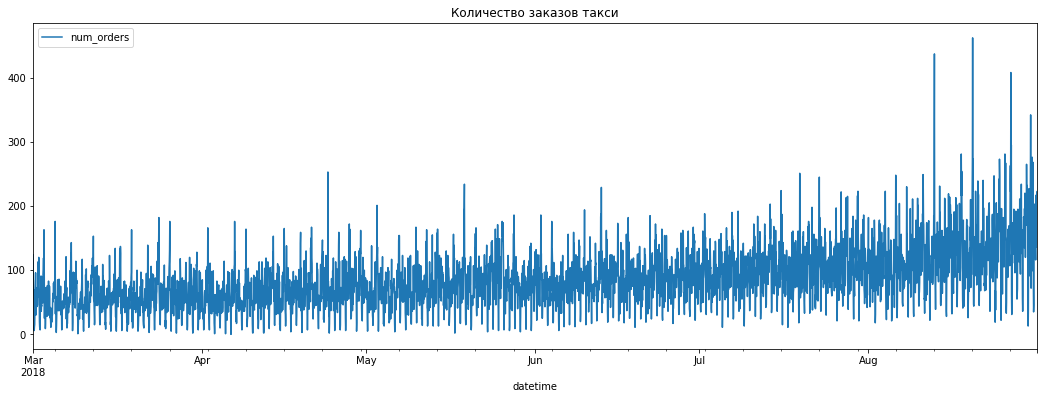

In [7]:
df=df.resample('1H').sum()
plt.figure(figsize=(18,6))
plt.title("Количество заказов такси")
df.plot(ax=plt.gca());

Рассемлировали данные по часу.

<h1>Вывод</h1>

На этапе подготовки данных мы создали датасет с индексами временного ряда, проверили на монотонность и рассемплировали данные по 1 часу как указано в задании и необходимо нам в дальнейшем для составления прогноза количества заказов на следующий час

## Анализ

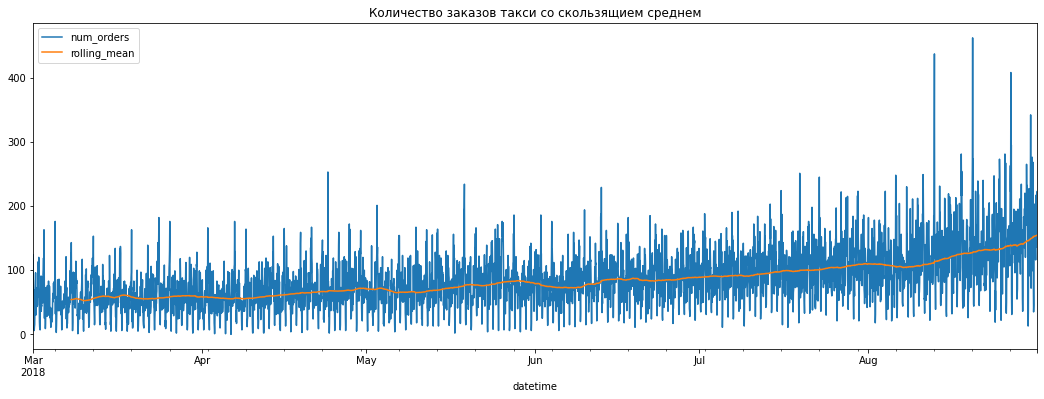

In [8]:
df['rolling_mean'] = df.rolling(24*7).mean()
plt.figure(figsize=(18,6))
plt.title("Количество заказов такси со скользящием среднем")
df.plot(ax=plt.gca());

Добавим скользящее среднее с разбивкой на недельные заказы

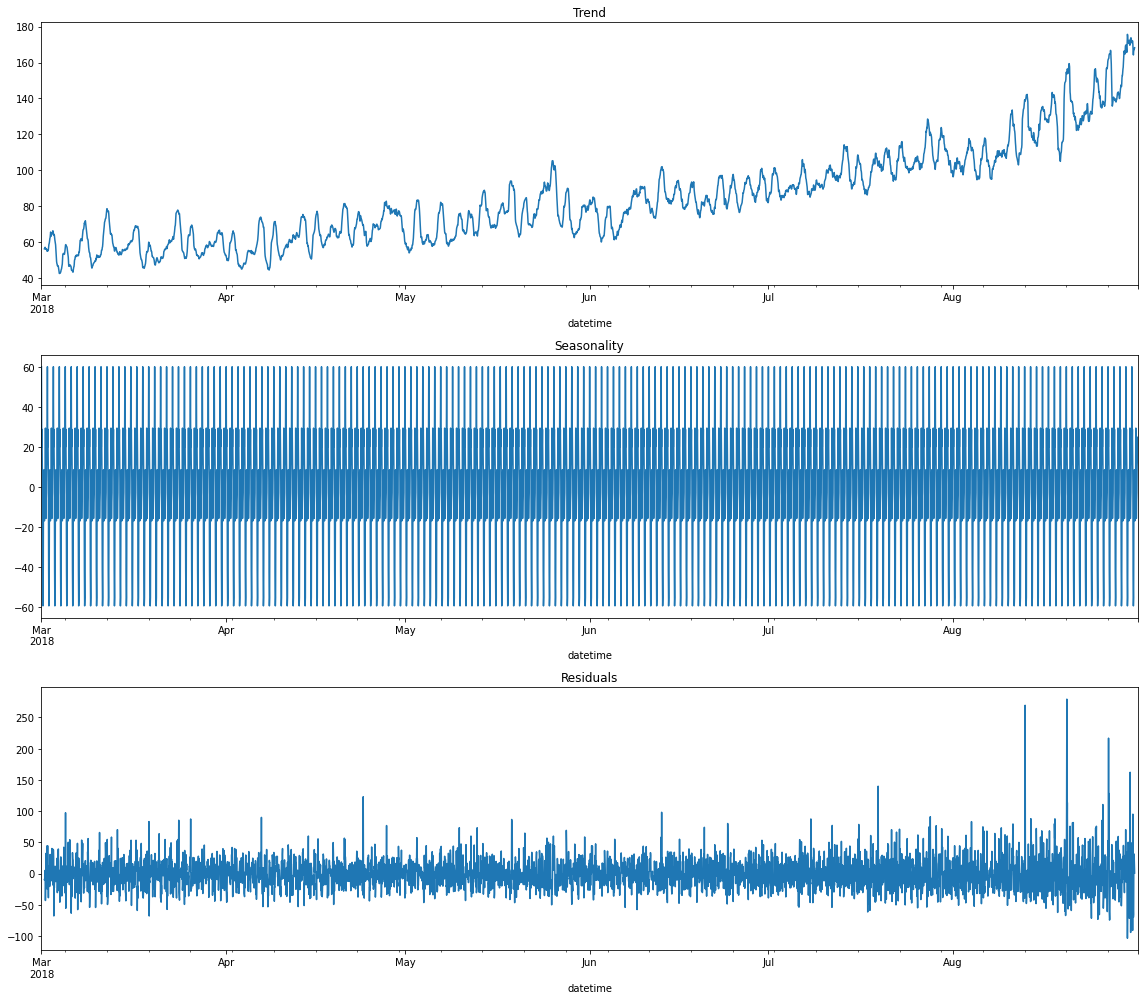

In [11]:
decomposed = seasonal_decompose(df.drop(['rolling_mean'], axis = 1))

plt.figure(figsize=(16, 14))
plt.subplot(311)

ax=plt.gca()
decomposed.trend.plot(ax=plt.gca()) 
plt.title('Trend')
plt.subplot(312)

decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot(313)

decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

Декомпозировали данные для просмотра наличия тренда, сезонности и остатков

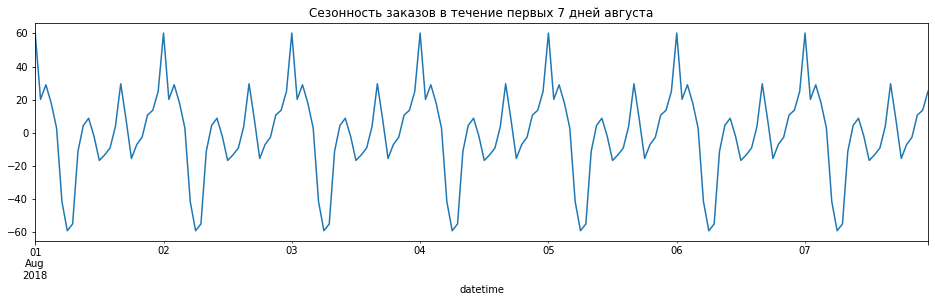

In [12]:
plt.figure(figsize=(16,4))
plt.title("Сезонность заказов в течение первых 7 дней августа")
decomposed.seasonal['2018-08-01':'2018-08-07'].plot(ax=plt.gca());

Посмотрели сезонность на примере первой недели августа. На графике видна каждодневная сезонность.

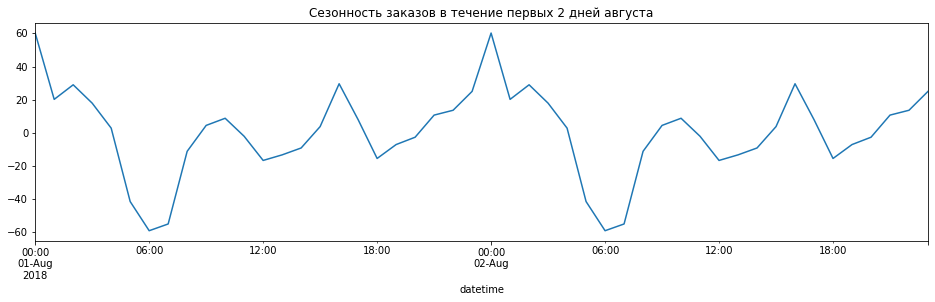

In [13]:
plt.figure(figsize=(16,4))
plt.title("Сезонность заказов в течение первых 2 дней августа")
decomposed.seasonal['2018-08-01':'2018-08-02'].plot(ax=plt.gca());

Посмотрели сезонность на примере 2-х дней.

<h1>Вывод</h1>

По полученным данным явно видно наличие увеличения заказов в течении года и ближе к полуночи. Уже сейчас мы можем с уверенностью сказать, что количество заказов увеличивается в 10 утра, 17 вечера и растет с 18 вечера до полуночи.

## Обучение

In [14]:
def make_features(df, max_lag, rolling_mean_size):
    data = df.copy()
    data = data.drop(['rolling_mean'], axis=1)
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data

Написали функцию для добавления признаков.

In [15]:
data = make_features(df, 24, 7)

Добавили признаки

In [16]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3950 entries, 2018-03-02 00:00:00 to 2018-08-13 13:00:00
Freq: H
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    3950 non-null   int64  
 1   year          3950 non-null   int64  
 2   month         3950 non-null   int64  
 3   day           3950 non-null   int64  
 4   dayofweek     3950 non-null   int64  
 5   lag_1         3950 non-null   float64
 6   lag_2         3950 non-null   float64
 7   lag_3         3950 non-null   float64
 8   lag_4         3950 non-null   float64
 9   lag_5         3950 non-null   float64
 10  lag_6         3950 non-null   float64
 11  lag_7         3950 non-null   float64
 12  lag_8         3950 non-null   float64
 13  lag_9         3950 non-null   float64
 14  lag_10        3950 non-null   float64
 15  lag_11        3950 non-null   float64
 16  lag_12        3950 non-null   float64
 17  lag_13        3950 non-null

Разбили данные на выборки, с тетвой выборкой в 10%

In [17]:
features_train=train.drop (['num_orders'], axis = 1)
target_train=train['num_orders']
features_test=test.drop (['num_orders'], axis = 1)
target_test=test['num_orders']

Разделили данные на признаки и целевой признак.

In [18]:
def rmse_score (target, predictions):
    rmse = mean_squared_error(target, predictions)**0.5
    return rmse

Написали функция RMSE

In [19]:
def model_look(model, parameters):

    scorer = make_scorer(rmse_score, greater_is_better=False)
    tscv = TimeSeriesSplit(n_splits=5)
    model_grid = GridSearchCV(model, parameters, cv=tscv, scoring=scorer, verbose=5, n_jobs=-1)
    model_grid.fit(features_train, target_train)
    return model_grid.best_score_, model_grid.best_params_

Написали функцию обучения моделей, поиска оптимальных гиперпараметров и значения RMSE

<h1>Обучение моделей:</h1>

<h1>LinearRegression</h1>

In [20]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}
rmse, best_parameters = model_look (LinearRegression(), parameters)
display('Лучшие параметры модели линейной регрессии:', best_parameters)
display('Дали RMSE модели:', rmse)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............fit_intercept=True, normalize=True; total time=   0.1s
[CV 2/5] END .............fit_intercept=True, normalize=True; total time=   0.3s
[CV 3/5] END .............fit_intercept=True, normalize=True; total time=   0.1s
[CV 4/5] END .............fit_intercept=True, normalize=True; total time=   0.2s
[CV 5/5] END .............fit_intercept=True, normalize=True; total time=   0.2s
[CV 1/5] END ............fit_intercept=True, normalize=False; total time=   0.0s
[CV 2/5] END ............fit_intercept=True, normalize=False; total time=   0.3s
[CV 3/5] END ............fit_intercept=True, normalize=False; total time=   0.1s
[CV 4/5] END ............fit_intercept=True, normalize=False; total time=   0.1s
[CV 5/5] END ............fit_intercept=True, normalize=False; total time=   0.1s
[CV 1/5] END ............fit_intercept=False, normalize=True; total time=   0.2s
[CV 2/5] END ............fit_intercept=False, nor

'Лучшие параметры модели линейной регрессии:'

{'fit_intercept': True, 'normalize': False}

'Дали RMSE модели:'

-27.020277978821525

In [21]:
results = pd.DataFrame ({'model':['LinearRegression'], 'best_parameters_train':[best_parameters], 'RMSE_train':[rmse]})
results

,model,best_parameters_train,RMSE_train
0,LinearRegression,"{'fit_intercept': True, 'normalize': False}",-27.020278


<h1>DecisionTreeRegressor</h1>

In [22]:
parameters = {'max_depth': range(4, 7, 1), 'min_samples_split': range(26, 29, 1)}
rmse, best_parameters = model_look (DecisionTreeRegressor(random_state=12345), parameters)
display('Лучшие параметры модели дерева решений:', best_parameters)
display('Дали RMSE модели:', rmse)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............max_depth=4, min_samples_split=26; total time=   0.0s
[CV 2/5] END ..............max_depth=4, min_samples_split=26; total time=   0.0s
[CV 3/5] END ..............max_depth=4, min_samples_split=26; total time=   0.0s
[CV 4/5] END ..............max_depth=4, min_samples_split=26; total time=   0.0s
[CV 5/5] END ..............max_depth=4, min_samples_split=26; total time=   0.0s
[CV 1/5] END ..............max_depth=4, min_samples_split=27; total time=   0.0s
[CV 2/5] END ..............max_depth=4, min_samples_split=27; total time=   0.0s
[CV 3/5] END ..............max_depth=4, min_samples_split=27; total time=   0.0s
[CV 4/5] END ..............max_depth=4, min_samples_split=27; total time=   0.0s
[CV 5/5] END ..............max_depth=4, min_samples_split=27; total time=   0.0s
[CV 1/5] END ..............max_depth=4, min_samples_split=28; total time=   0.0s
[CV 2/5] END ..............max_depth=4, min_sampl

'Лучшие параметры модели дерева решений:'

{'max_depth': 5, 'min_samples_split': 27}

'Дали RMSE модели:'

-29.843421323279166

In [23]:
results = results.append({'model':'DecisionTreeRegressor', 'best_parameters_train':best_parameters, 'RMSE_train':rmse}, ignore_index=True)
results

,model,best_parameters_train,RMSE_train
0,LinearRegression,"{'fit_intercept': True, 'normalize': False}",-27.020278
1,DecisionTreeRegressor,"{'max_depth': 5, 'min_samples_split': 27}",-29.843421


<h1>RandomForestRegressor</h1>

In [24]:
parameters = {'n_estimators': range(146, 148, 1), 'max_depth': range(17, 20, 1)}
rmse, best_parameters = model_look (RandomForestRegressor(random_state=12345), \
                                    parameters)
display('Лучшие параметры модели случайного леса:', best_parameters)
display('Дали RMSE модели:', rmse)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .................max_depth=17, n_estimators=146; total time=   1.2s
[CV 2/5] END .................max_depth=17, n_estimators=146; total time=   2.5s
[CV 3/5] END .................max_depth=17, n_estimators=146; total time=   3.9s
[CV 4/5] END .................max_depth=17, n_estimators=146; total time=   5.2s
[CV 5/5] END .................max_depth=17, n_estimators=146; total time=   6.6s
[CV 1/5] END .................max_depth=17, n_estimators=147; total time=   1.2s
[CV 2/5] END .................max_depth=17, n_estimators=147; total time=   2.4s
[CV 3/5] END .................max_depth=17, n_estimators=147; total time=   3.9s
[CV 4/5] END .................max_depth=17, n_estimators=147; total time=   4.9s
[CV 5/5] END .................max_depth=17, n_estimators=147; total time=   6.7s
[CV 1/5] END .................max_depth=18, n_estimators=146; total time=   1.2s
[CV 2/5] END .................max_depth=18, n_est

'Лучшие параметры модели случайного леса:'

{'max_depth': 18, 'n_estimators': 146}

'Дали RMSE модели:'

-25.69240569277185

In [ ]:
results = results.append({'model':'RandomForestRegressor', 'best_parameters_train':best_parameters, 'RMSE_train':rmse}, ignore_index=True)
results

<h1>CatBoostRegressor</h1>

In [ ]:
parameters = {'depth': range(2, 5, 1), 'iterations': range(18, 22, 1)}
rmse, best_parameters = model_look (CatBoostRegressor(loss_function="RMSE", \
                                                      learning_rate = 0.5), parameters)
display('Лучшие параметры модели CatBoostRegressor:', best_parameters)
display('Дали RMSE модели:', rmse)

In [ ]:
results = results.append({'model':'CatBoostRegressor', 'best_parameters_train':best_parameters, 'RMSE_train':rmse}, ignore_index=True)
results

<h1>LGBMRegressor</h1>

In [ ]:
parameters = {'n_estimators':range(38, 42, 1)}
rmse, best_parameters = model_look (LGBMRegressor(random_state=12345), parameters)
display('Лучшие параметры модели LGBMRegressor:', best_parameters)
display('Дали RMSE модели:', rmse)

In [ ]:
results = results.append({'model':'LGBMRegressor', 'best_parameters_train':best_parameters, 'RMSE_train':rmse}, ignore_index=True)
results

<h1>Вывод:</h1>

Как видим, лучше всего показала себя LGBMRegressor

## Тестирование

In [ ]:
def ml_result(model):
    
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    
    rmse = mean_squared_error(target_test, predictions)**0.5

    plt.figure(figsize=(15,5))
    plt.title('Сравнение реальных значений и предсказанных')

    plt.plot(target_test.index, predictions, 'r', label='Предсказания')
    plt.plot(target_test.index, target_test.values, 'g', label='Реальные значения')
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return rmse

Напишем функцию обучения моделей с выводом RMSE и графиком соотношений предсказаний с реальными значениями

<h1>Проверим модели:</h1>

<h1>LGBMRegressor</h1>

In [ ]:
rmse = ml_result(LGBMRegressor(random_state=12345, n_estimators=41))
results.loc[4, 'rmse_test'] = rmse
results

<h1>Вывод:</h1>

Дерево решений не оправдало надежд, не уложившись в значение RMSE не более 48. Лучшая модель LGBMRegressor.

<h1>Общий вывод:</h1>


Для получения результата в принятии решений в условиях задачи мной выполнено:
<ul>
<li>Сортировка по индексу, проверка на монотонность, рассемплирование временного ряда по часу, выявлены тренды и сезонность.</li>

<li>Обучил моделями линейного леса, дерева решений, случайного дерева, CatBoostRegressor и LGBMRegressor</li>

<li>Нашел лучшие гиперпараметры данных моделей при обучении на обучающей выборке</li>

<li>Проверили модели с лучшими гиперпараметрами на тестовой выборке</li>
</ul>
В процессе проверки наших моделей на тестовой выборке все модели, кроме модели дерева решений уложились в значение метрики RMSE не более 48. Наилучшие значения оказались у модели LGBMRegressor. Данную модель можно рекомендовать к исполнению.
